In [1]:
import numpy as np

import basix.ufl

In [2]:
element = basix.ufl.element("Lagrange", "triangle", 1)

In [9]:
element.cell_type

CellType.triangle

In [10]:
points = np.array([[0.0, 0.1], [0.3, 0.2]])
values = element.tabulate(0, points) # evaluate basis functions at the given points

In [11]:
values

array([[[9.00000000e-01, 5.55111512e-17, 1.00000000e-01],
        [5.00000000e-01, 3.00000000e-01, 2.00000000e-01]]])

In [5]:
values = element.tabulate(1, points)
values

array([[[ 9.00000000e-01,  5.55111512e-17,  1.00000000e-01],
        [ 5.00000000e-01,  3.00000000e-01,  2.00000000e-01]],

       [[-1.00000000e+00,  1.00000000e+00, -4.30845614e-17],
        [-1.00000000e+00,  1.00000000e+00, -4.30845614e-17]],

       [[-1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        [-1.00000000e+00,  0.00000000e+00,  1.00000000e+00]]])

In [7]:
values.shape # shape (num_spatial_derivatives+1, num_points, num_basis_functions)

(3, 2, 3)

In [8]:
## Visualizing the basis functions

In [14]:
points = basix.create_lattice(element.cell_type, 15 - 1, basix.LatticeType.equispaced, exterior=True)
len(points)

120

In [15]:
values = element.tabulate(1, points)

In [17]:
values.shape

(3, 120, 3)

In [18]:
import matplotlib.pyplot as plt

In [30]:
def plot_basis_functions(element, M: int):
    """Plot the basis functions and the first order derivatives sampled at
    `M` points along each direction of an edge of the reference element.

    :param element: The basis element
    :param M: Number of points
    :return: The matplotlib instances for a plot of the basis functions
    """
    # We use basix to sample points (uniformly) in the reference cell
    points = basix.create_lattice(element.cell_type, M - 1, basix.LatticeType.equispaced, exterior=True)

    # We evaluate the basis function and derivatives at the points
    values = element.tabulate(1, points)

    # Determine the layout of the plots
    num_basis_functions = values.shape[2]
    num_columns = values.shape[0]
    plt.figure(dpi=40)
    derivative_dir = ["x", "y"]
    figs = [
        plt.subplots(1, num_columns, layout="tight", subplot_kw={"projection": "3d"})
        for i in range(num_basis_functions)
    ]
    colors = plt.rcParams["axes.prop_cycle"]()
    for i in range(num_basis_functions):
        _, axs = figs[i]
        [(ax.set_xlabel("x"), ax.set_ylabel("y")) for ax in axs.flat]
        for j in range(num_columns):
            ax = axs[j]
            ax.scatter(points[:, 0], points[:, 1], values[j, :, i], color=next(colors)["color"])
            if j > 0:
                ax.set_title(
                    r"$\partial\phi_{i}/\partial {x_j}$".format(i="{" + f"{i}" + "}", x_j=derivative_dir[j - 1])
                )
            else:
                ax.set_title(r"$\phi_{i}$".format(i="{" + f"{i}" + "}"))
    return figs

<Figure size 256x192 with 0 Axes>

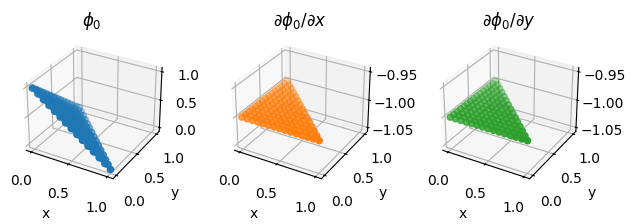

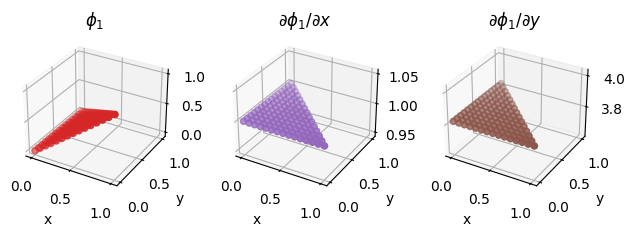

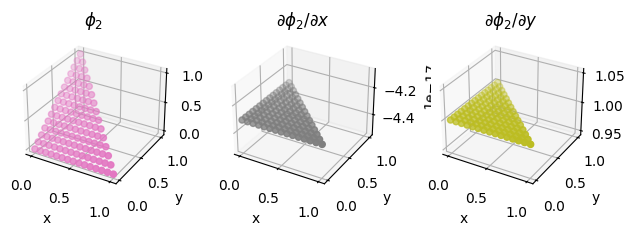

In [31]:
fig = plot_basis_functions(element, 15)

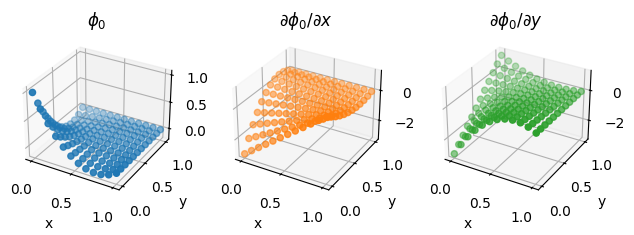

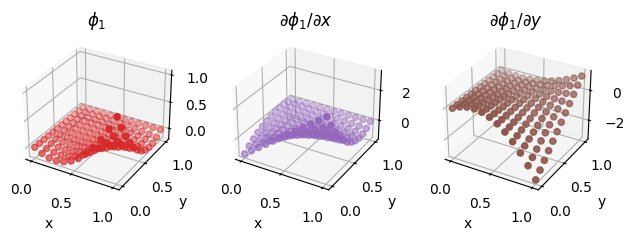

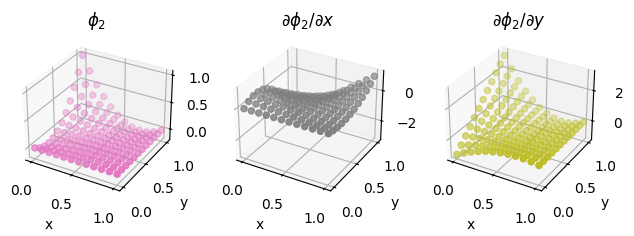

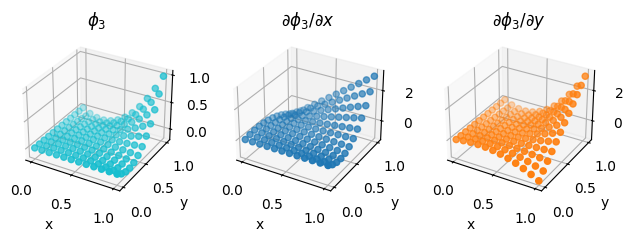

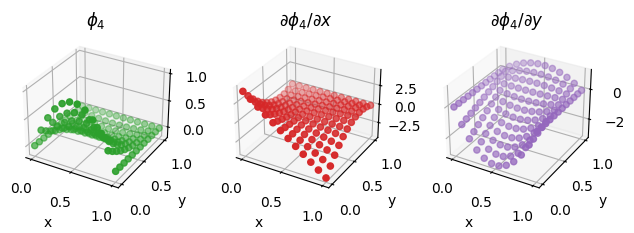

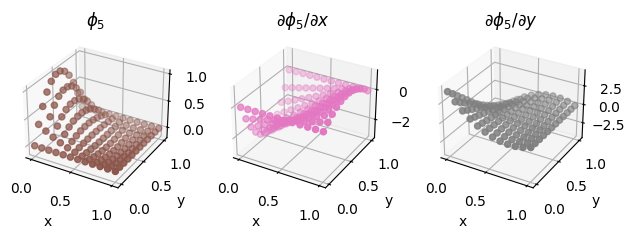

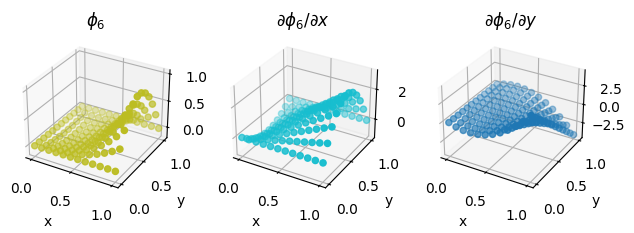

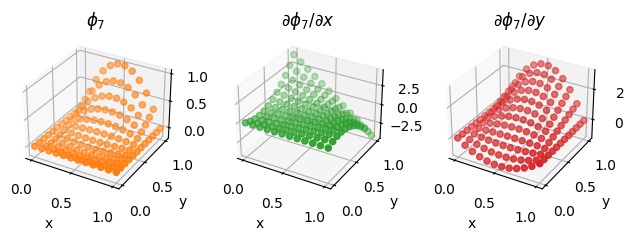

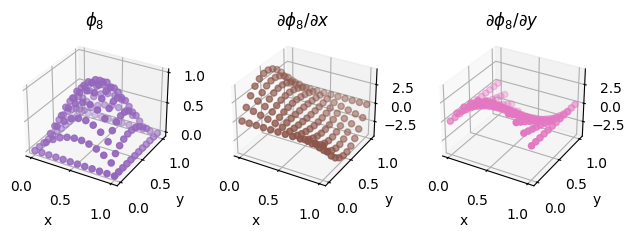

In [21]:
second_order_element = basix.ufl.element("Lagrange", "quadrilateral", 2, basix.LagrangeVariant.gll_warped)
fig = plot_basis_functions(second_order_element, 12)

In [23]:
low_precision_element = basix.ufl.element("Lagrange", "triangle", 1, dtype=np.float32)
points = np.array([[0.0, 0.1], [0.3, 0.2]])
points_low_precision = points.astype(np.float32)
basis_values = low_precision_element.tabulate(0, points_low_precision)
print(f"{basis_values=}\n   {basis_values.dtype=}")

basis_values=array([[[8.9999998e-01, 2.9802322e-08, 1.0000001e-01],
        [5.0000000e-01, 3.0000001e-01, 2.0000002e-01]]], dtype=float32)
   basis_values.dtype=dtype('float32')


In [24]:
# Exercise

In [28]:
element1 = basix.ufl.element('Lagrange', 'quadrilateral', 3, basix.LagrangeVariant.gll_warped)

In [33]:
# basix.LagrangeVariant.equispaced
element2 = basix.ufl.element('Lagrange', 'quadrilateral', 3, basix.LagrangeVariant.equispaced)

<Figure size 256x192 with 0 Axes>

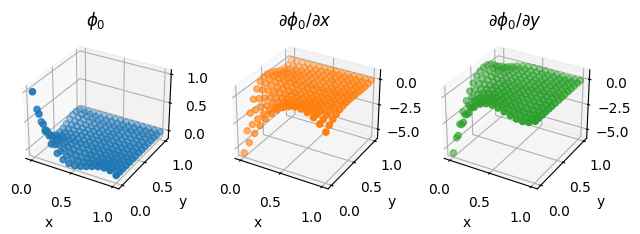

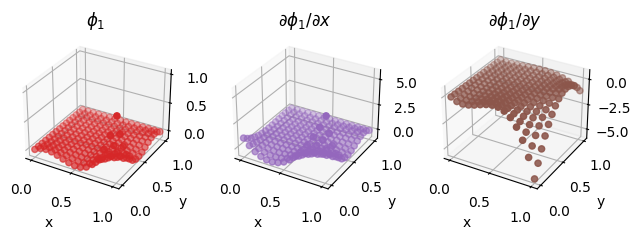

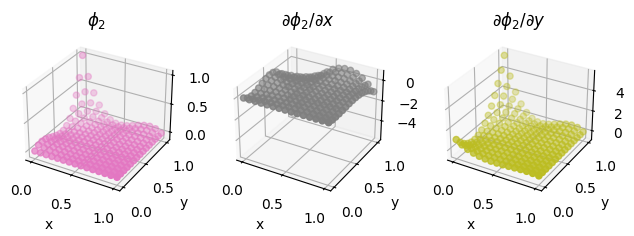

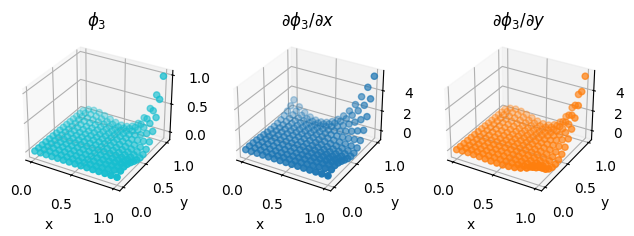

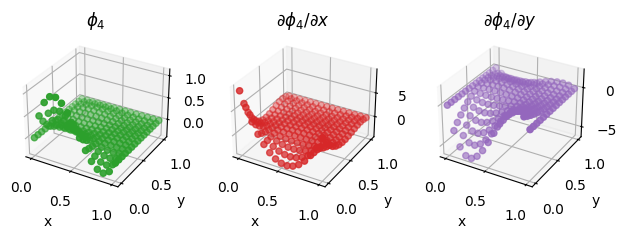

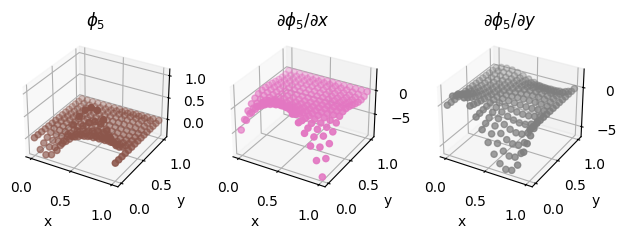

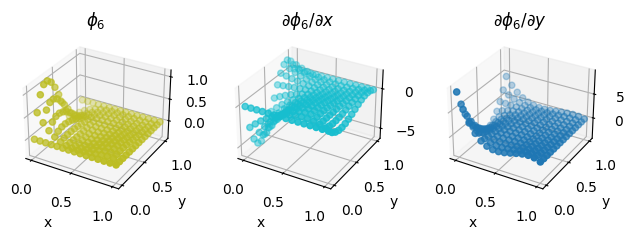

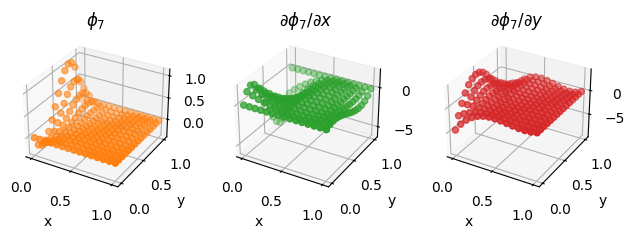

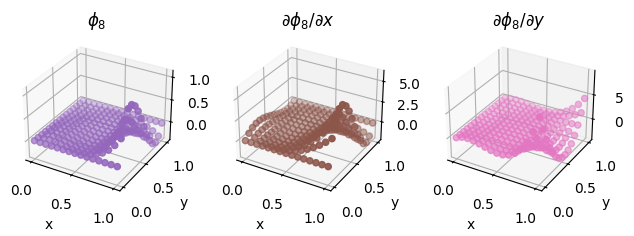

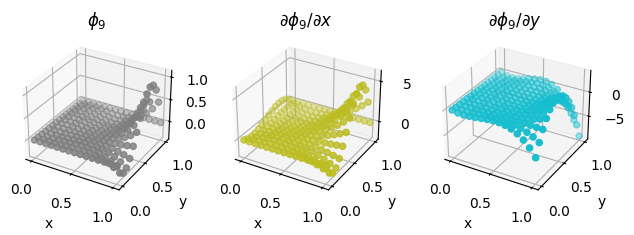

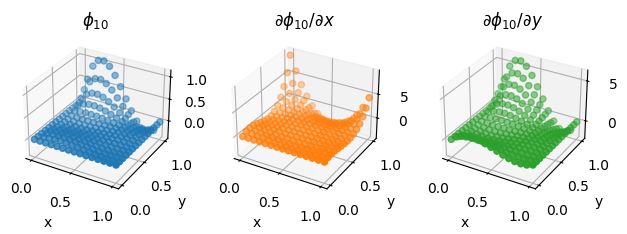

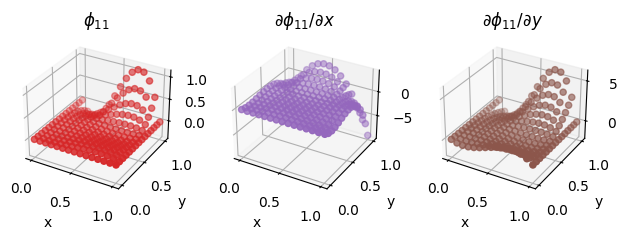

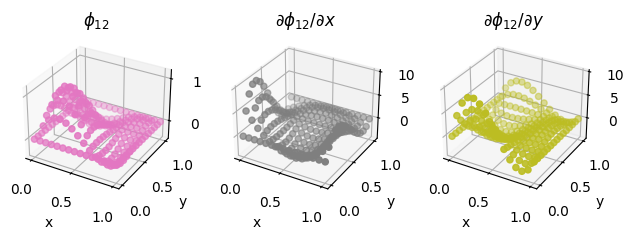

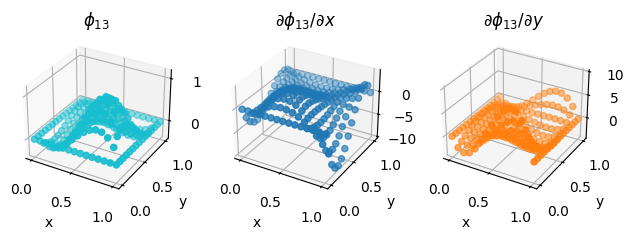

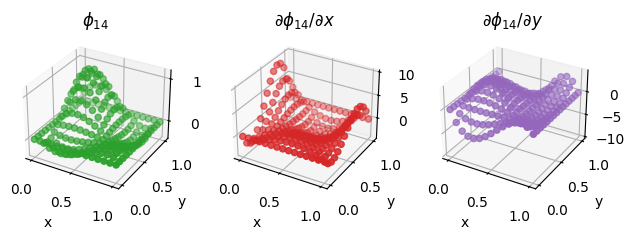

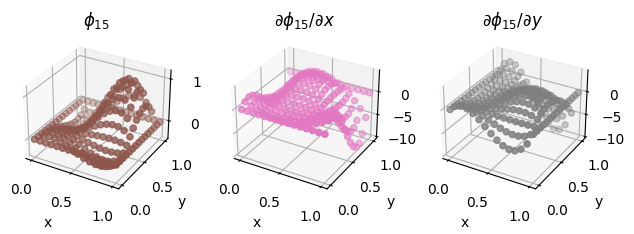

In [34]:
fig = plot_basis_functions(element2, 15)

<Figure size 256x192 with 0 Axes>

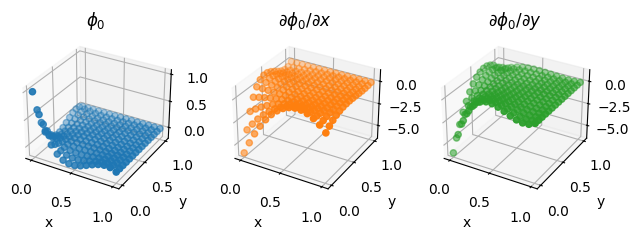

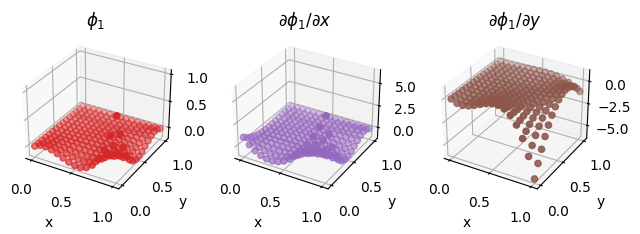

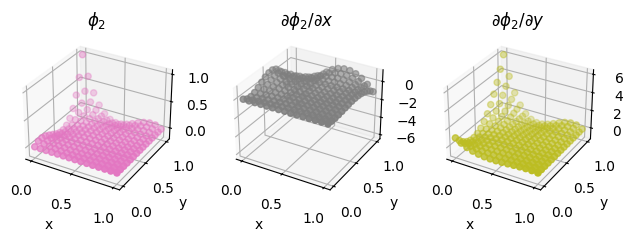

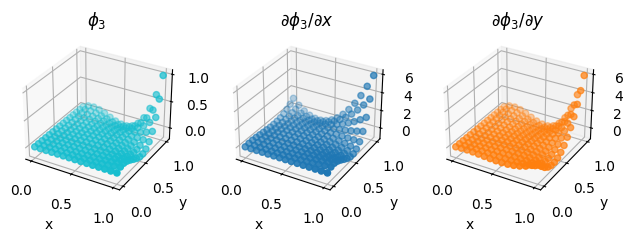

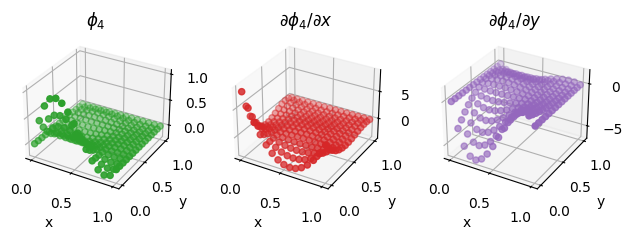

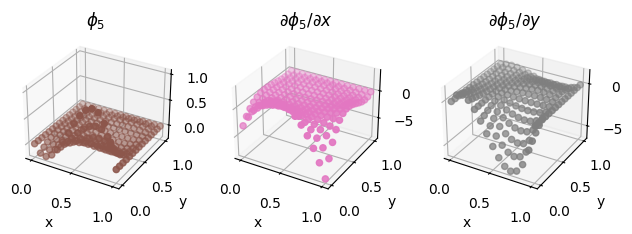

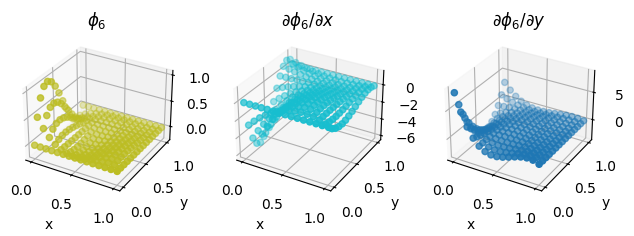

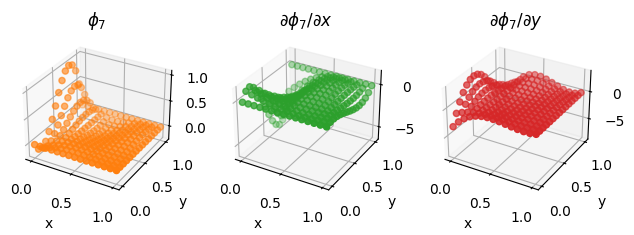

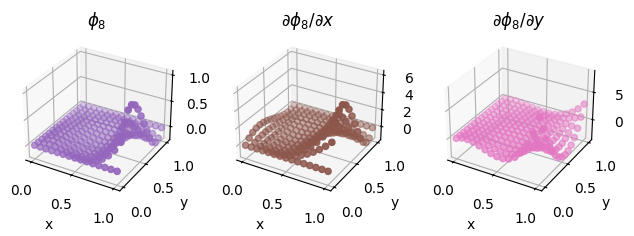

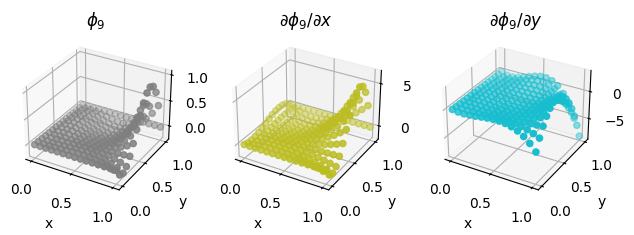

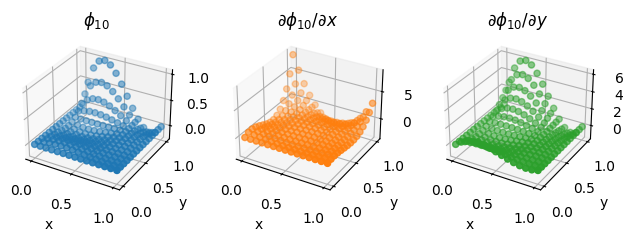

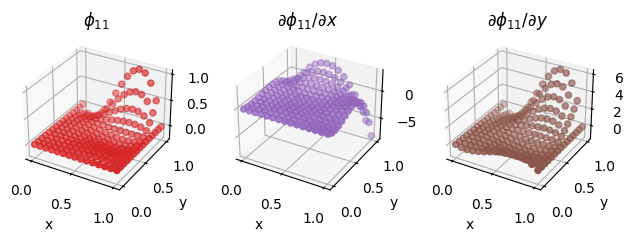

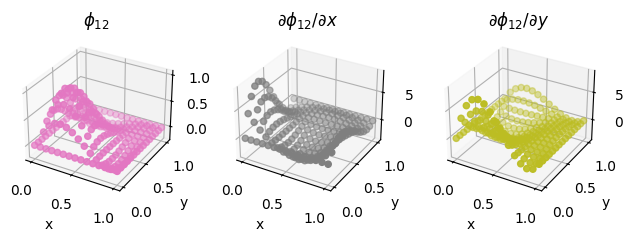

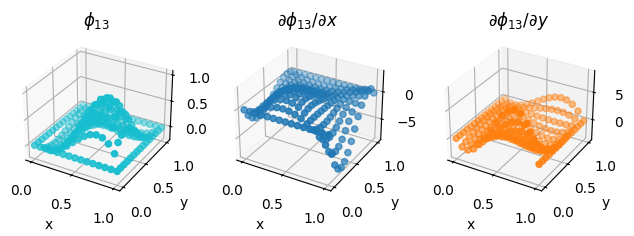

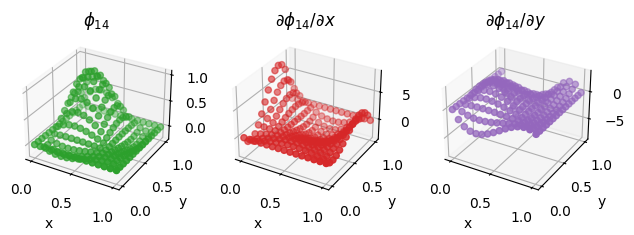

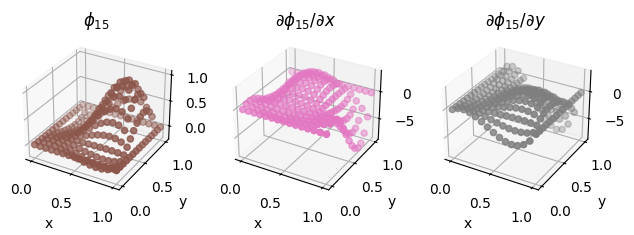

In [35]:
fig = plot_basis_functions(element1, 15)

In [36]:
import numpy as np

import basix.ufl

reference_points = basix.create_lattice(
    basix.CellType.triangle, 8, basix.LatticeType.gll, exterior=False, method=basix.LatticeSimplexMethod.warp
)

In [39]:
reference_points

array([[0.07049245, 0.07049245],
       [0.19773226, 0.08429537],
       [0.3635668 , 0.09126483],
       [0.54516837, 0.09126483],
       [0.71797237, 0.08429537],
       [0.8590151 , 0.07049245],
       [0.08429537, 0.19773226],
       [0.21983534, 0.21983534],
       [0.38637247, 0.22725505],
       [0.56032931, 0.21983534],
       [0.71797237, 0.19773226],
       [0.09126483, 0.3635668 ],
       [0.22725505, 0.38637247],
       [0.38637247, 0.38637247],
       [0.54516837, 0.3635668 ],
       [0.09126483, 0.54516837],
       [0.21983534, 0.56032931],
       [0.3635668 , 0.54516837],
       [0.08429537, 0.71797237],
       [0.19773226, 0.71797237],
       [0.07049245, 0.8590151 ]])

In [41]:
def compute_physical_point(p0, p1, p2, X):
    """
    Map coordinates `X` in reference element to triangle defined by `p0`, `p1` and `p2`
    """
    el = basix.ufl.element("Lagrange", "triangle", 1)
    basis_values = el.tabulate(0, X)
    x = basis_values[0] @ np.vstack([p0, p1, p2])
    return x

In [42]:
p0 = np.array([2.0, 1.8])
p1 = np.array([1.0, 1.2])
p2 = np.array([1.3, 1.0])
x = compute_physical_point(p0, p1, p2, reference_points)

In [43]:
x

array([[1.88016284, 1.70131057],
       [1.74326098, 1.61392435],
       [1.57254782, 1.50884806],
       [1.39094625, 1.39988711],
       [1.22302087, 1.30178028],
       [1.09164018, 1.22819698],
       [1.77729205, 1.59123697],
       [1.62627992, 1.49223052],
       [1.45454899, 1.38637247],
       [1.28578595, 1.28793414],
       [1.14361504, 1.21103077],
       [1.65423841, 1.45438766],
       [1.50228422, 1.35454899],
       [1.34316679, 1.25907854],
       [1.20033487, 1.18204554],
       [1.52711731, 1.3091064 ],
       [1.38793414, 1.21983534],
       [1.25481534, 1.14572522],
       [1.41312397, 1.17504488],
       [1.29968708, 1.10698275],
       [1.32819698, 1.07049245]])

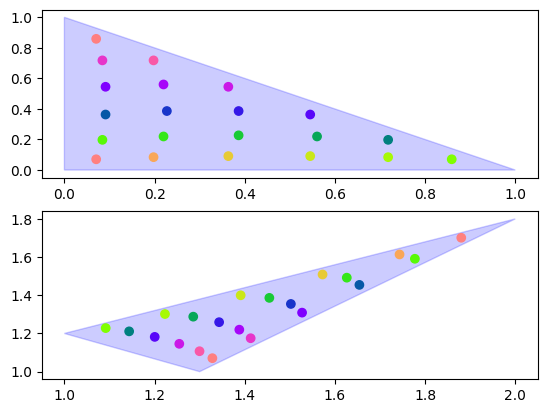

In [44]:
import matplotlib.pyplot as plt

theta = 2 * np.pi
phi = np.linspace(0, theta, reference_points.shape[0])
rgb_cycle = (
    np.stack((np.cos(phi), np.cos(phi - theta / 4), np.cos(phi + theta / 4))).T + 1
) * 0.5  # Create a unique colors for each node

fig, (ax_ref, ax) = plt.subplots(2, 1)
# Plot reference points
reference_vertices = basix.cell.geometry(basix.CellType.triangle)
ref_triangle = plt.Polygon(reference_vertices, color="blue", alpha=0.2)
ax_ref.add_patch(ref_triangle)
ax_ref.scatter(reference_points[:, 0], reference_points[:, 1], c=rgb_cycle)
# Plot physical points
vertices = np.vstack([p0, p1, p2])
triangle = plt.Polygon(vertices, color="blue", alpha=0.2)
ax.add_patch(triangle)
_ = ax.scatter(x[:, 0], x[:, 1], c=rgb_cycle)